In [68]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scripts import functions

#setup color pallet
BLACK = "#000000"
WHITE = "#FFFFFF"
GRAY = "#3B3131"
BACKGROUND_1 = "#008080"
project_pallet = {"black":        "#000000",
                  "white":        "#FFFFFF",
                  "draw":         "#3B3131",
                  "background_1": "#008080",
                  "background_2": "#00cbf6",
                  "resign":       "#7700ff",
                  "mate":         "#ff0000",
                  "out_of_time":  "#00ff95",
                  "turns":        "#ff00dd"}

# load dataframe
df = functions.load('../../data/processed/data.csv')

**Task 5 Research Analysis**

Research Question: What are the amount of turns in each game for White Winners, Black
Winners. We also wanted to find out the amount of turns overall for each games. In the future
we are looking to find an average number of turns for a winning game. This can be shown in the
Scatterplot shown below.

- It seems that the threshold of turns durastically increases in games that end as a draw, as oppopsed to a white winner or a a black winner.
- It also seems that the difference between white and black winning is quite small. I would like to research the exact difference in the future.

In our analyses, we looked into the amount of turns each game, and formulated a histogram
from the results which can be shown below. 
1. The majority of the games consisted of around 40 - 8 terms, with a steep drop off after that. 
2. Most games were less than 75 turns, afterwards the amount of games steeply falls.
3. In the future, I would like to investigate how many games ended in a draw after around 150 turns.

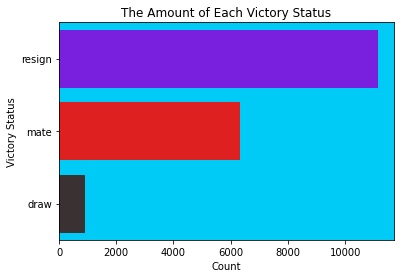

In [59]:
ax = sns.countplot(y='victory_status', data=df, palette=project_pallet)
ax.set_facecolor(project_pallet["background_2"])
plt.xlabel("Count")
plt.ylabel("Victory Status")
plt.title('The Amount of Each Victory Status')
plt.savefig('../../images/victory_status.png')

**Research Question:** 

What is the most common victory status? and Why?*
In our analysis, first we wanted to understand what is the most common victory status.
Eventually, we would like to determine why that certain status&#39; happen more than others, and
what could lead to a specific one. Shown in the chat below is a countplot of the 3 victory status&;
from our dataset:

1. Mate
2. Resign
3. Draw


Shown the above countplot, resign seems to be the most common victory status. It happens in
almost double the amount of games that mate does. We are not sure why this is. Later in our
analyses, we are going to see all the different types of openings to a match. This could be a
possible effect of a victory status.

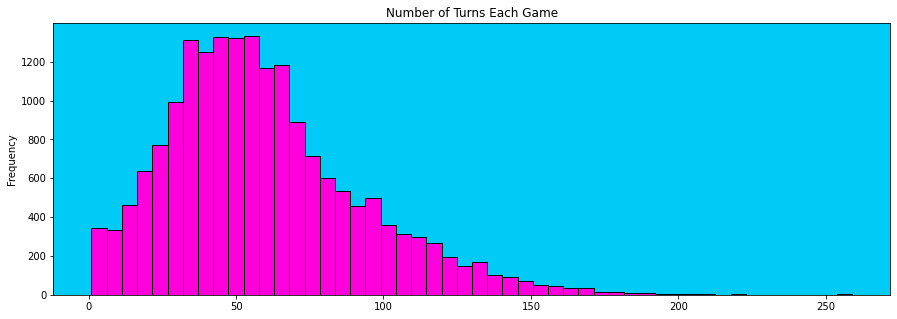

In [65]:
ax = df['turns'].plot(kind='hist', bins=50, figsize=(15,5), facecolor=project_pallet["turns"], edgecolor='black')
ax.set_facecolor(project_pallet["background_2"])
plt.title('Number of Turns Each Game')
plt.savefig('../../images/number_turns.png')

# Research Question: **SPELLCHECK + ADD MORE TO END OF THIS BLOCK**
**What openings lead to more complex games, which ones are easily refuted?** <br>
To perform this analysis, a few vairables have to be known:
1. The most common openings and what they result in (white or black winning, or a draw)
2.  a) Which openings result in checkmate or the opponent resigning, compared to a draw or running out of time <br>
    b) Which openings take lead to shorter/longer games <br>
    
&nbsp;&nbsp;&nbsp;&nbsp; Instead of relying on the opening names in from lichess's database, we instead chose to use the opening codes from the Encyclopaedia of Chess Openings (ECO). These are more reliable when analysing openings because openings can often lead to similar or even the same positions but through a different move order and therefor are named differently. ECO codes solve this by describing the 'state' of the opening and organizing those states into 5 different volumes: <br>


_Volume A_: <br>
&nbsp;&nbsp;&nbsp;&nbsp; Flank Openings - openings played outside the d and e files <br>
_Volume B_: <br>
&nbsp;&nbsp;&nbsp;&nbsp; Semi-Open Games (Except the French) - openings that start with 1. e4 and where black immediately breaks symetry by playing something other than e5<br>
_Volume C_: <br>
&nbsp;&nbsp;&nbsp;&nbsp; Open Games (Including the French) - openings that start with 1. e4 e5 (both kings' pawns move 2 ranks)<br>
_Volume D_: <br>
&nbsp;&nbsp;&nbsp;&nbsp; Closed and Semi-Closed Games - openings that start with 1. d4 (black playing d5 results in a Closed game, anything else is a Semi-Closed)<br>
_Volume E_: <br>
&nbsp;&nbsp;&nbsp;&nbsp; Indian Defence - games started by 1. d4 Nf6<br>

# 1.

In [66]:
#instance helper class
win_count = functions.WinCount()
win_count.setup(df)

#create dicts
white_wins = win_count.create_winner_specific_dict("white")
black_wins = win_count.create_winner_specific_dict("black")
draw_occurences = win_count.create_winner_specific_dict("draw")

#sieve dicts
sieved_win_count = win_count.sieve(threshold=450)
sieved_white_win_count = win_count.sieve_winner_specific_dict(winner_dict=white_wins, threshold=225)
sieved_black_win_count = win_count.sieve_winner_specific_dict(winner_dict=black_wins, threshold=180)
sieved_draw_occurences_count = win_count.sieve_winner_specific_dict(winner_dict=draw_occurences, threshold=20)

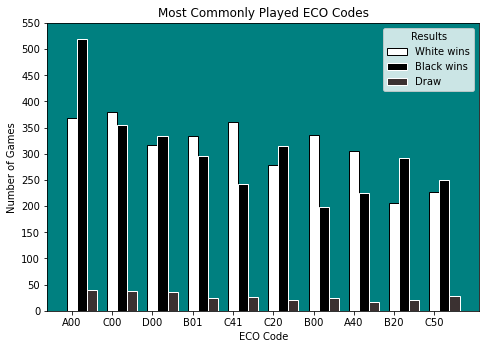

In [80]:
# take sieved_win_count and separate it into [eco codes], [win count dict] + sort it alphabetically 
totals = win_count.totals(sieved_win_count)
sorted_sieved_win_count = {k: v for k, v in sorted(sieved_win_count.items(), key=lambda item: totals[item[0]], reverse=True)}
x, y = zip(*sorted_sieved_win_count.items())

# turn win count dict into 2d list for plotting [[white], [black], [draw]]
# this has to be done because sieved_win_count is a 2d dict
temp = [[], [], []]
for d in y:
    temp[0].append(d["white"])
    temp[1].append(d["black"])
    temp[2].append(d["draw"])
y = temp

#setup and plot
max_ytick = max(*y[0], *y[1], *y[2]) + max(*y[0], *y[1], *y[2]) // 10
ystep = 50
index = np.arange(len(x))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(index + 0.00, y[0], color=project_pallet["white"], width=0.25, edgecolor=project_pallet["black"])
ax.bar(index + 0.25, y[1], color=project_pallet["black"], width=0.25, edgecolor=project_pallet["white"])
ax.bar(index + 0.50, y[2], color=project_pallet["draw"], width=0.25, edgecolor=project_pallet["white"])
ax.legend(title="Results", labels=["White wins", "Black wins", "Draw"])
ax.set_xticks(index)
ax.set_xticklabels(x)
ax.set_yticks(np.arange(0, max_ytick, ystep))
ax.set_facecolor(project_pallet["background_1"])

plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("Most Commonly Played ECO Codes")
plt.savefig("../../images/commonly_played_eco_codes.png")

<p> &nbsp;&nbsp;&nbsp;&nbsp; The most commonly played ECO codes reveal a few expected behaviours. The code 'A00' refers to Uncommon Openings (1. g4, a3, h3, etc.), and is categorized as flank openings. This shows that flank openings by nature, are weak openings. To expand on this discovery, flank openings allow for control of the center of the board to be lost on turn 1 which in turn explains why black has an advantage. Another observation can be made from the visualization: both 'C41' and 'B00' have close to double the wins for white than black. Both opening codes start with 1. e4 showing that the king's pawn is inherently one of the strongest pieces when talking from a positional perspective.</p>

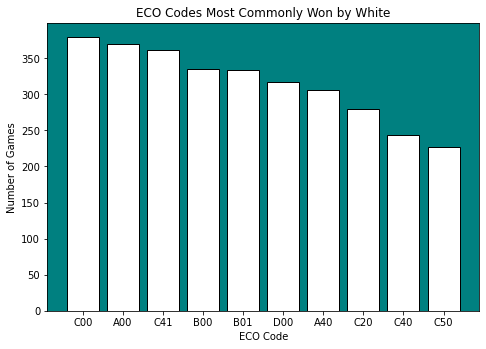

In [76]:
# unpack + sort sieved_white_win_count
x, y = zip(*sorted(sieved_white_win_count.items(), key=lambda item: item[1], reverse=True))

#setup + plot
max_ytick = max(y) + max(y) // 10
ystep = 10
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x=x, height=y, color=project_pallet["white"],edgecolor=project_pallet["black"])
ax.set_facecolor(project_pallet["background_1"])

plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("ECO Codes Most Commonly Won by White")
plt.savefig("../../images/white_won_eco_codes.png")

<p> &nbsp;&nbsp;&nbsp;&nbsp; When observing only the ECO codes that lead to games being won by white we can see that half of the codes present belong to volume 'C': 1. e4 e5. This reinforces the concept that the kings pawn is inheritantly strong positionally, and regardless of how the game unfolds from there, white has - to some degree - a small advantage. Interestingly, both 'C40' and 'C50' both share a common pattern 1. e4 e5 2. Nf3 Nc6 and both are on the end of the most common codes ending in wins. This can be explained by the fact that white's pawn on e4 is unguarded and can be won if white doesn't respond preciecely to black's attack. </p>

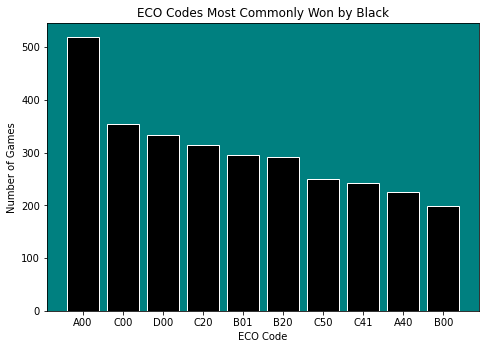

In [74]:
# unpack + sort sieved_black_win_count
x, y = zip(*sorted(sieved_black_win_count.items(), key=lambda item: item[1], reverse=True))

#setup + plot
max_ytick = max(y) + max(y) // 10
ystep = 10
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x=x, height=y, color=project_pallet["black"], edgecolor=project_pallet["white"])
ax.set_facecolor(project_pallet["background_1"])

plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("ECO Codes Most Commonly Won by Black")
plt.savefig("../../images/black_won_eco_codes.png")

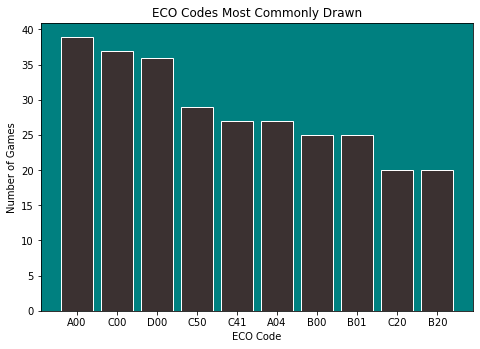

In [82]:
# unpack + sort sieved_draw_occurences_count
x, y = zip(*sorted(sieved_draw_occurences_count.items(), key=lambda item: item[1], reverse=True))

#setup + plot
max_ytick = max(y) + max(y) // 10
ystep = 10
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x=x, height=y, color=project_pallet["draw"], edgecolor=project_pallet["white"])
ax.set_facecolor(project_pallet["background_1"])

plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("ECO Codes Most Commonly Drawn")
plt.savefig("../../images/drawn_eco_codes.png")

# 2.
## a)

In [ ]:
# opening vs outcome

## b)

In [ ]:
# opening vs time taken